### Time Series Stock Market Analysis

#### 1.Understand the objective and goal of the project

In [33]:
# Objective:  
# To explore various time series models to understand historical patterns, identify trends and seasonality, and make short-term or long-term predictions.

# Goal:
# The goal of this study is to analyze the performance of three widely used forecasting methods: ARIMA, SARIMA, LSTM, and FBProphet. 
# ARIMA  is a  time series  data  statistical  model  that  captures  linear  relationships  and stationarity.
# SARIMA
# Recurrent  neural  networks, such as LSTM, are able to recognize nonlinear patterns and long-term dependencies.  
# FB Prophet is a Facebook-developed time series forecasting library that use an additive regression model to account for trend, seasonality, and holiday impacts.
    
# The  results  show that  each strategy  has  advantages and  disadvantages in projecting  stock market  values. 
# When  the  underlying  data  is  steady  and linear,  ARIMA  works  well. In  contrast,  LSTM  excels  in  capturing nonlinear  and  
# complicated relationships.  FB  Prophet performs  admirably when dealing with trend and seasonality patterns.This study examines the performance  
# of  ARIMA,  LSTM,  and  FB  Prophet  in  stock  market forecasting,  allowing  practitioners  to  choose  the  best approach  depending on the  
# peculiarities  of  their  data  and  forecasting  objectives.

##### 2. Data Collection

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

# For inline charts in Jupyter
%matplotlib inline
sns.set(style='whitegrid')

In [35]:
df = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")

In [36]:
df

,date,open,high,low,close,volume
0,2023-11-30 10:00:00,1200.00,1400.00,1200.00,1396.25,6904852
1,2023-11-30 10:01:00,1396.85,1399.80,1331.35,1334.45,2971833
2,2023-11-30 10:02:00,1337.65,1379.20,1335.00,1371.25,1500669
3,2023-11-30 10:03:00,1371.00,1376.20,1360.25,1362.00,1175256
4,2023-11-30 10:04:00,1361.80,1366.25,1352.65,1355.70,734969
...,...,...,...,...,...,...
153589,2025-07-25 15:25:00,707.45,707.45,707.15,707.20,2163
153590,2025-07-25 15:26:00,707.15,707.25,707.05,707.15,6521
153591,2025-07-25 15:27:00,707.10,707.10,707.00,707.00,4393
153592,2025-07-25 15:28:00,707.00,707.75,707.00,707.10,5326


##### 3. Data Understanding

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153594 entries, 0 to 153593
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    153594 non-null  object 
 1   open    153594 non-null  float64
 2   high    153594 non-null  float64
 3   low     153594 non-null  float64
 4   close   153594 non-null  float64
 5   volume  153594 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.0+ MB


In [38]:
df.shape

(153594, 6)

In [39]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [40]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

##### 4. Data Preprocessing

In [41]:
# Converting the Date column from Object data type to Datetime64 format:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df['date']

0        2023-11-30 10:00:00
1        2023-11-30 10:01:00
2        2023-11-30 10:02:00
3        2023-11-30 10:03:00
4        2023-11-30 10:04:00
                 ...        
153589   2025-07-25 15:25:00
153590   2025-07-25 15:26:00
153591   2025-07-25 15:27:00
153592   2025-07-25 15:28:00
153593   2025-07-25 15:29:00
Name: date, Length: 153594, dtype: datetime64[ns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153594 entries, 0 to 153593
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    153594 non-null  datetime64[ns]
 1   open    153594 non-null  float64       
 2   high    153594 non-null  float64       
 3   low     153594 non-null  float64       
 4   close   153594 non-null  float64       
 5   volume  153594 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 7.0 MB


In [44]:
df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

##### 5. Exploratory data analysis

In [45]:
# Extract month_name, day_name and year and add columns
df['year'] = pd.DatetimeIndex(df['date']).year
df['month_name'] = pd.DatetimeIndex(df['date']).month_name()
df['day_name'] = pd.DatetimeIndex(df['date']).day_name()

In [46]:
df

,date,open,high,low,close,volume,year,month_name,day_name
0,2023-11-30 10:00:00,1200.00,1400.00,1200.00,1396.25,6904852,2023,November,Thursday
1,2023-11-30 10:01:00,1396.85,1399.80,1331.35,1334.45,2971833,2023,November,Thursday
2,2023-11-30 10:02:00,1337.65,1379.20,1335.00,1371.25,1500669,2023,November,Thursday
3,2023-11-30 10:03:00,1371.00,1376.20,1360.25,1362.00,1175256,2023,November,Thursday
4,2023-11-30 10:04:00,1361.80,1366.25,1352.65,1355.70,734969,2023,November,Thursday
...,...,...,...,...,...,...,...,...,...
153589,2025-07-25 15:25:00,707.45,707.45,707.15,707.20,2163,2025,July,Friday
153590,2025-07-25 15:26:00,707.15,707.25,707.05,707.15,6521,2025,July,Friday
153591,2025-07-25 15:27:00,707.10,707.10,707.00,707.00,4393,2025,July,Friday
153592,2025-07-25 15:28:00,707.00,707.75,707.00,707.10,5326,2025,July,Friday


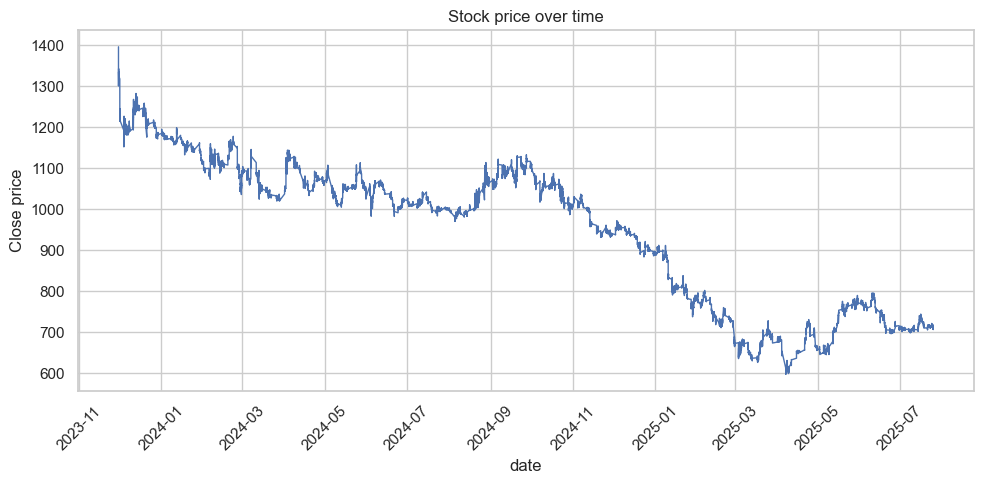

In [47]:
# Line chart close price over time
plt.figure(figsize=(10,5))
plt.plot(df['date'],df['close'],linewidth=1)
plt.title("Stock price over time")
plt.xlabel("date")
plt.ylabel("Close price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

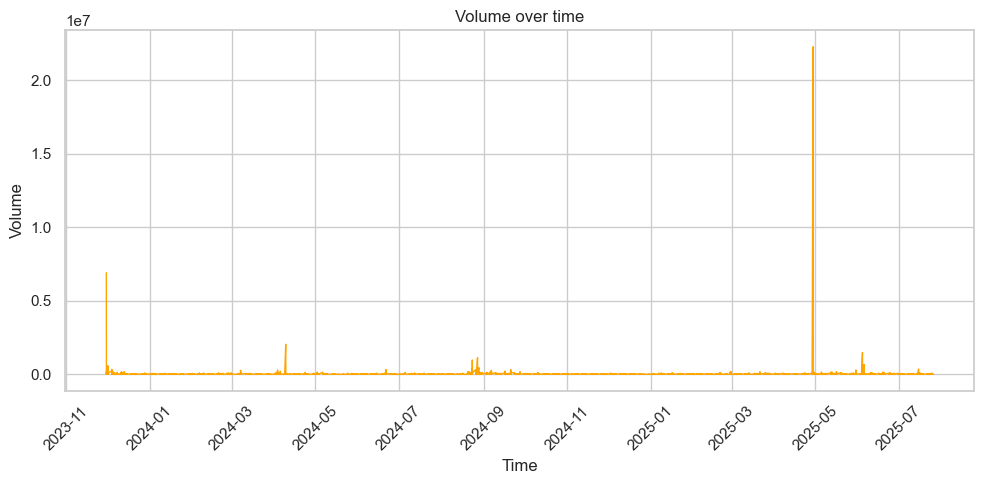

In [48]:
# volume over time
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['volume'], color='orange', linewidth=1)
plt.title("Volume over time")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

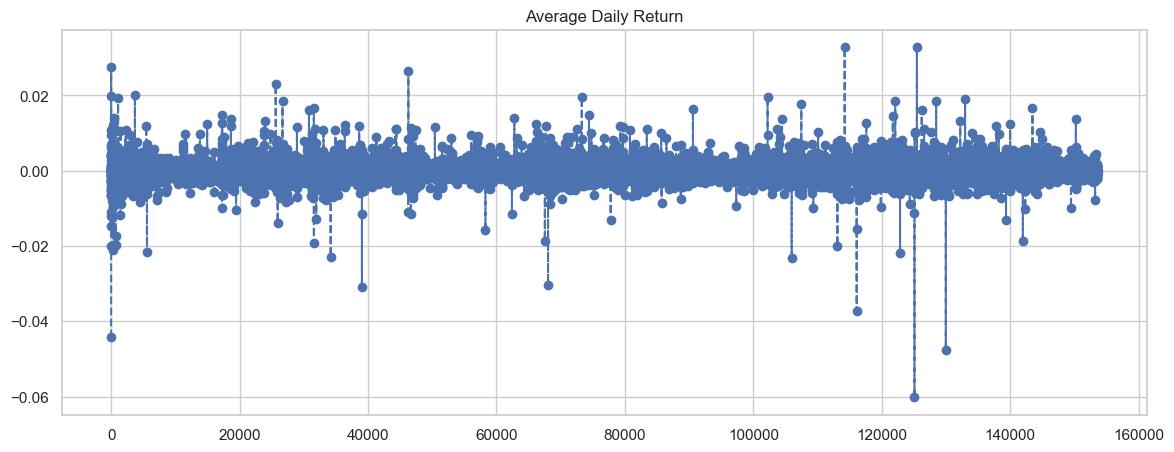

In [49]:
# Calculating the returns for stock using the percent change or pct_change() function:
plt.figure(figsize=(10,5))
df['returns'] = df['close'].pct_change()
df['returns'].plot(figsize=(14,5),linestyle='--',marker='o')
plt.xlabel('')
plt.title("Average Daily Return")
plt.show()

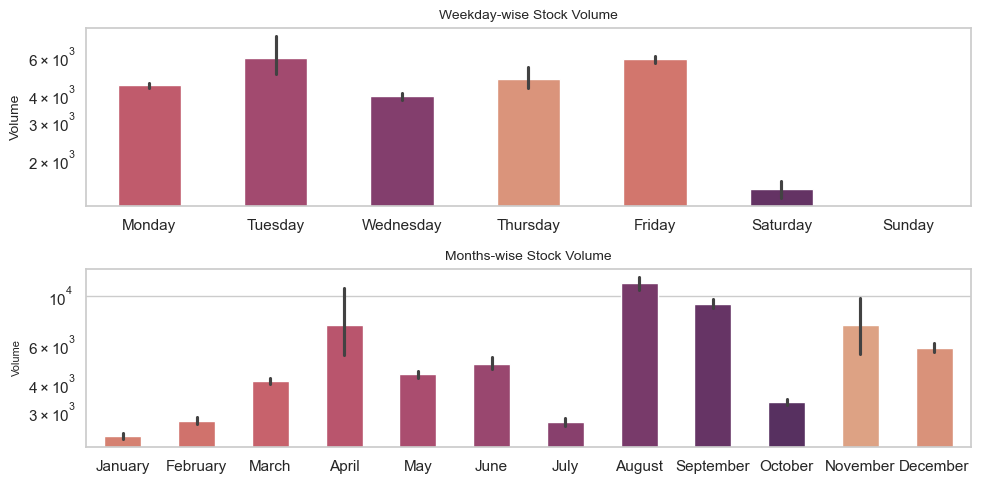

In [50]:
# Visualizing Movements in Volumes by Weekdays and by Months as Bar Subplots- 
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# specifying the order of bar plots for weekdays:
order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(data=df, x='day_name', y='volume', palette="flare", hue='day_name', ax=axes[0], order =order, width=0.5) # Adjust width as desired
axes[0].set_title("Weekday-wise Stock Volume",fontsize=10)
axes[0].set_yscale("log") 
axes[0].set_ylabel("Volume",fontsize=10)
axes[0].set_xlabel("",fontsize=10)
# axes[0].grid(which="minor",color="grey", linestyle="--")

# specifying the order of bar plots for Months:
order2 = [ "January", "February", "March", "April", "May", "June","July", 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=df, x='month_name', y='volume', palette="flare", hue='month_name', ax=axes[1], order = order2, width=0.5)
axes[1].set_title("Months-wise Stock Volume",fontsize=10)
axes[1].set_yscale("log")
axes[1].set_ylabel("Volume",fontsize=8)
axes[1].set_xlabel("",fontsize=8)
# axes[1].grid(which="minor",color="grey", linestyle="--")

plt.tight_layout()
plt.show()

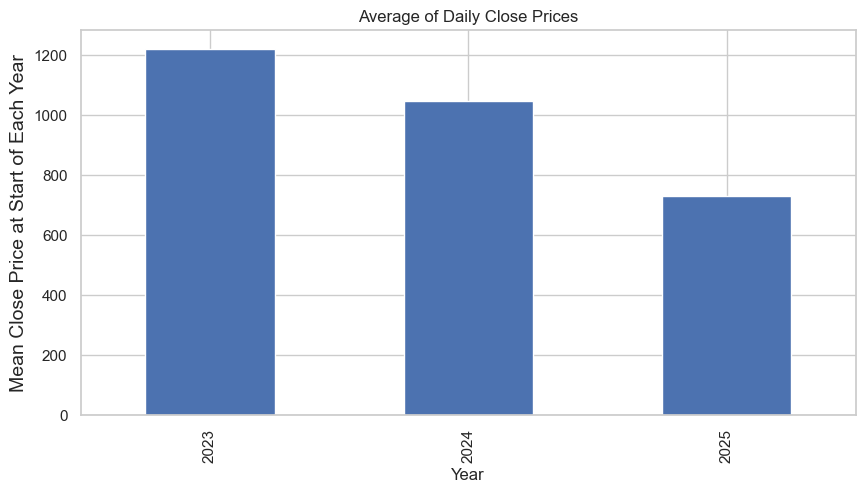

In [51]:
### Plotting the Mean of Daily Closing Price at the Start of every Year

# First, creating a copy of dataset:
rolling_data = df.copy()

# Group by year from the date column
yearly_mean = rolling_data.groupby(rolling_data['date'].dt.year)['close'].mean()

# Plot as bar chart
ax = yearly_mean.plot.bar(figsize=(10,5))

# Set plot labels and title
ax.set(title='Average of Daily Close Prices')
plt.ylabel('Mean Close Price at Start of Each Year', size=14)
plt.xlabel('Year')
plt.show()

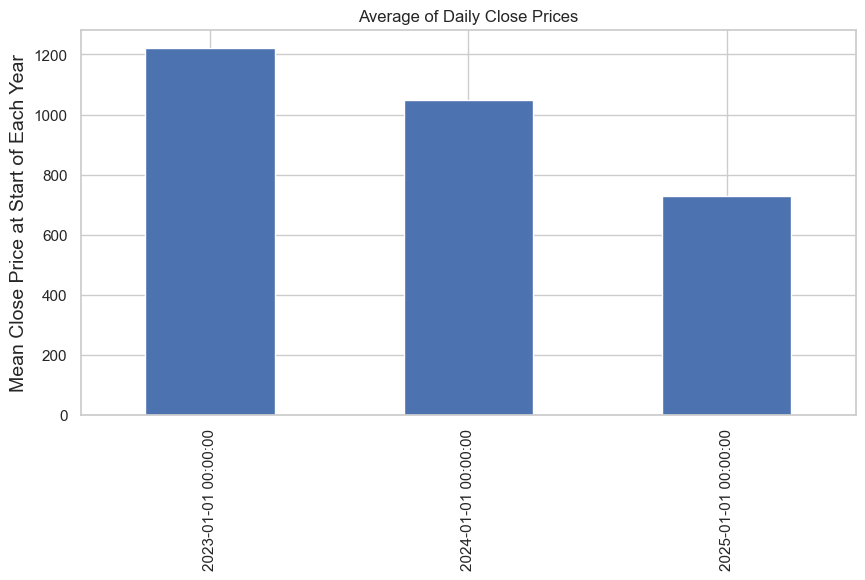

In [52]:
# convert date column to datetime and set it as index before resampling.-- optional for understanding difference

# Make a copy
rolling_d = df.copy()

# Ensure date column is datetime
rolling_d['date'] = pd.to_datetime(rolling_d['date'])

# Set date column as index-
rolling_d.set_index('date', inplace=True)

# Resample yearly (start of year = 'YS') and plot mean close prices
ax = rolling_d['close'].resample(rule='YS').mean().plot.bar(figsize=(10,5))

# Set plot labels and title
ax.set(title='Average of Daily Close Prices')
plt.ylabel('Mean Close Price at Start of Each Year', size=14)
plt.xlabel('')
plt.show()

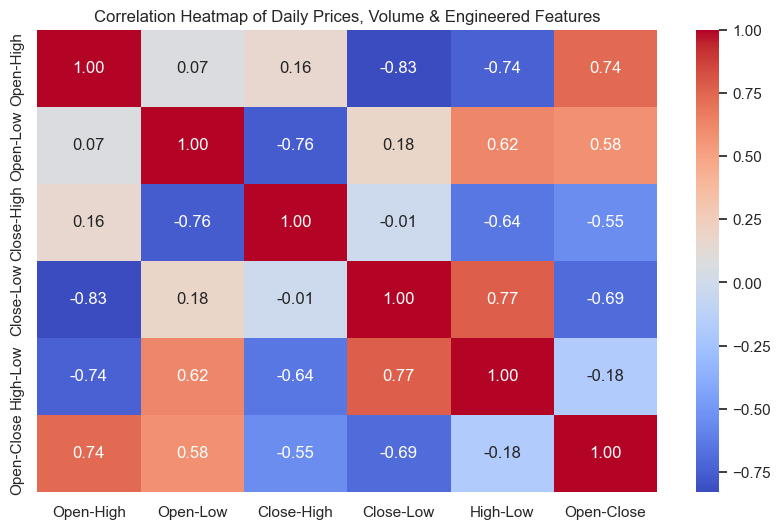

In [53]:
### Exploring the Correlation between Different INOX Daily Prices
# Step 1: Create a copy of the original dataset
k_corr_df = df.copy()

# Step 2: Feature Engineering - adding new columns to the new dataset created:
k_corr_df['Open-High'] = k_corr_df['open'] - k_corr_df['high']
k_corr_df['Open-Low'] = k_corr_df['open'] - k_corr_df['low']
k_corr_df['Close-High'] = k_corr_df['close'] - k_corr_df['high']
k_corr_df['Close-Low'] = k_corr_df['close'] - k_corr_df['low']
k_corr_df['High-Low'] = k_corr_df['high'] - k_corr_df['low']
k_corr_df['Open-Close'] = k_corr_df['open'] - k_corr_df['close']

# Step 3: Keep only numeric columns (drop categorical ones)
# Includes: open, high, low, close, volume + engineered features
k_corr_df2 = k_corr_df.copy()
k_corr_df2 = k_corr_df.drop(['date', 'open', 'close', 'high', 'low', 'volume', 'year','month_name','day_name', 'returns'], axis=1)

# Step 4: Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(k_corr_df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Daily Prices, Volume & Engineered Features")
plt.show()

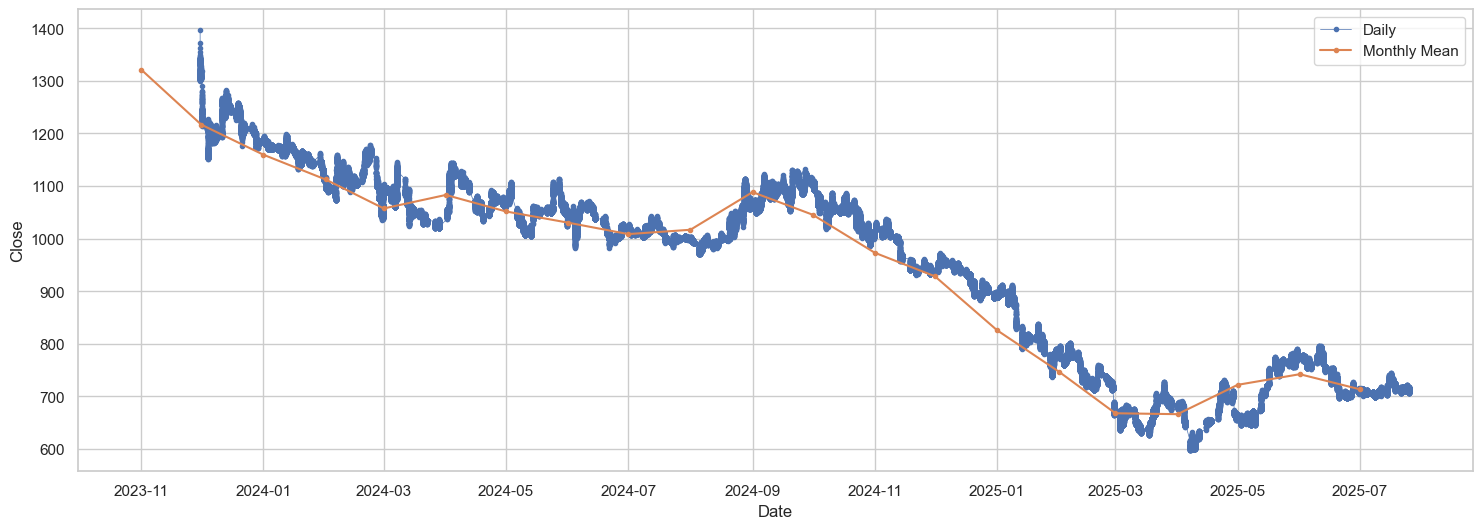

In [54]:
fig, ax = plt.subplots(figsize=(18, 6))

# Plot Daily Close
ax.plot(df['date'], df['close'], marker='.', linestyle='-', linewidth=0.5, label='Daily')

# Compute Monthly Mean using groupby on date column
monthly_mean = df.groupby(df['date'].dt.to_period('M'))['close'].mean()

# Convert PeriodIndex back to timestamp for plotting
monthly_mean.index = monthly_mean.index.to_timestamp()

# Plot Monthly Mean
ax.plot(monthly_mean.index, monthly_mean, marker='o', markersize=3, linestyle='-', label='Monthly Mean')

# Labels and legend
ax.set_ylabel('Close')
ax.set_xlabel('Date')
ax.legend()
plt.show()

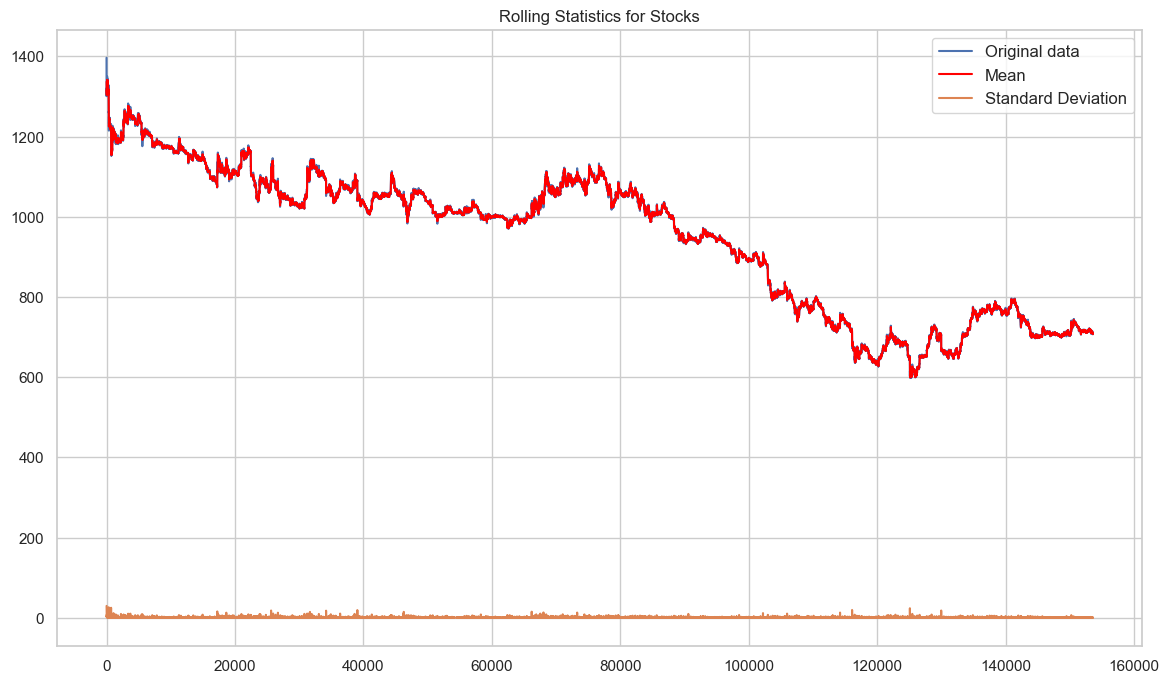

In [55]:
# Determining the rolling statistics -
kalyan= df['close']

# calculating the rolling mean and standard deviation with window sizes of 12: 
roll_mean =kalyan.rolling(12).mean() 
roll_std = kalyan.rolling(12).std()

# plotting the rolling statistics alongwith the original data: 
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['close'], label= 'Original data')
ax.plot(roll_mean, label='Mean',color='red')
ax.plot(roll_std, label='Standard Deviation')
plt.title('Rolling Statistics for Stocks', fontsize=12)
ax.legend(fontsize=12)
plt.show()

#### 6. Forecasting Models

In [56]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'year', 'month_name',
       'day_name', 'returns'],
      dtype='object')

In [ ]:
!pip list

In [ ]:
%pip install Prophet

##### A. Prophet Forecasting

In [65]:
from prophet import Prophet

df = df.reset_index()[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

#Fit the model
model=Prophet()
model.fit(df)

future=model.make_future_dataframe(periods=365)

#Prediction
forecast=model.predict(future)

#Plot the forecasting
model.plot(forecast)
plt.title('TATATECH Stock Price Pred')
plt.show()

KeyError: "['close'] not in index"

In [30]:
df.head()

,open
date,
2021-03-26 09:15:00,47.85
2021-03-29 09:15:00,NaN
2021-03-30 09:15:00,75.95
2021-03-31 09:15:00,71.75
2021-04-01 09:15:00,68.60


##### B. ARIMA Forecasting

-----------STOCK PRICE PREDICTION BY ARIMA ---------------
Shape of Training Set: (1018, 1)
Shape of Validation Set: (113, 1)
RMSE value on validation set: 51.80069861495456
----------------------------------------------------------


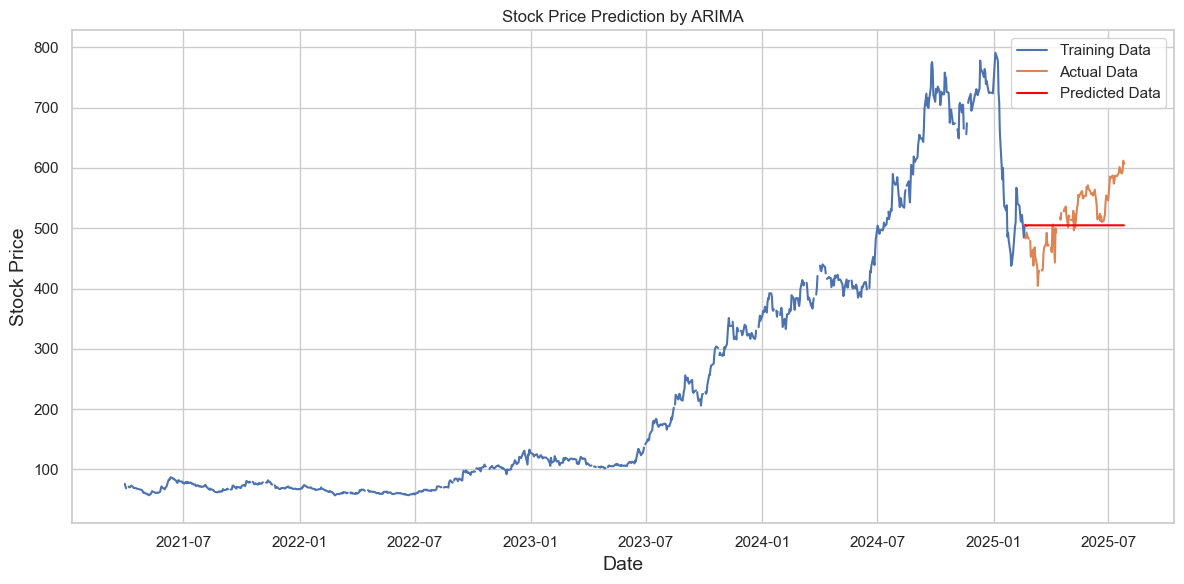

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Forecasting Function
def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['open']].copy()
    df_new['open'] = np.log(df_new['open'])  # Log transform

    # Train/Validation Split
    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]

    print('-----------STOCK PRICE PREDICTION BY ARIMA ---------------')

    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)

    training = train_set['open']
    validation = valid_set['open']

    #Fit ARIMA(p,d,q) model
    model = ARIMA(training, order=(5, 1, 0))  # You can tune this order
    model_fit = model.fit()

    #Forecast
    forecast_log = model_fit.forecast(steps=len(validation))
    forecast_log = pd.Series(forecast_log, index=validation.index)
    forecast = np.exp(forecast_log)  # Inverse of log transform

    # RMSE
    actual = np.exp(validation)  # Inverse transform to compare in original scale
    rmse = np.sqrt(np.mean((actual - forecast) ** 2))
    print('RMSE value on validation set:', rmse)
    print('----------------------------------------------------------')

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.exp(train_set['open']), label='Training Data')
    plt.plot(actual, label='Actual Data')
    plt.plot(forecast, label='Predicted Data', color='red')
    plt.xlabel('Date', size=14)
    plt.ylabel('Stock Price', size=14)
    plt.title('Stock Price Prediction by ARIMA', size=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load Stock Data from CSV
df = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[['open']].dropna()

# Ensure frequency is set (business day)
df = df.asfreq('B')

# Run the prediction
moving_avg_prediction(df)


##### C. SARIMA Forecasting

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2021-03-26 09:15:00 to 2025-07-25 09:15:00
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1067 non-null   float64
dtypes: float64(1)
memory usage: 17.7 KB


2025-09-04 15:36:20.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 15:36:20.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


-----------STOCK PRICE PREDICTION BY SARIMA--------------
Shape of Training Set: (1018, 1)
Shape of Validation Set: (113, 1)
RMSE value on validation set: nan
-----------------------------------------------------------


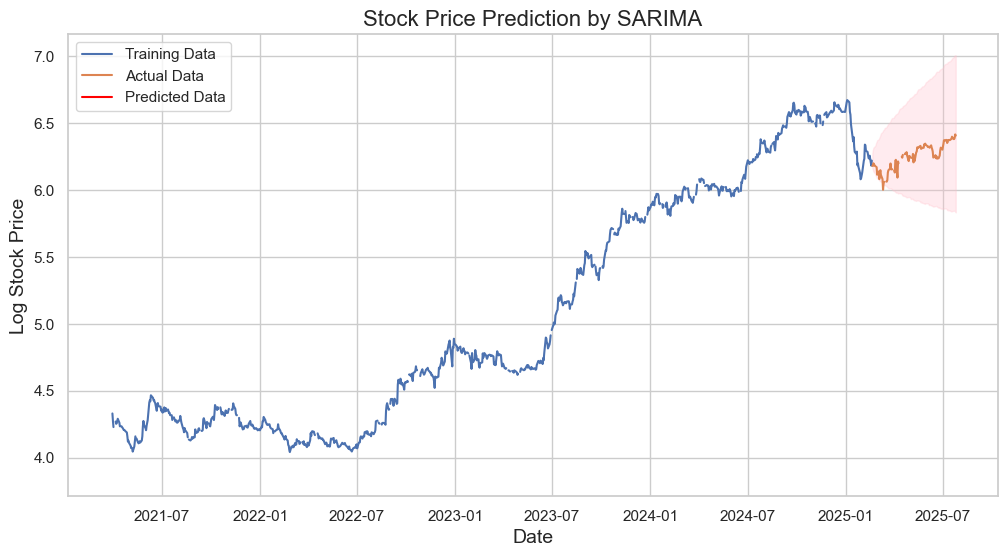

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import streamlit as st

def sarima_prediction(data):
    shape = df.shape[0]
    
    # Create a copy to avoid warnings
    df_new = df[['open']].copy()
    df_new['open'] = np.log(df_new['open'])  # Apply log transformation
    
    # Split data
    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]

    print('-----------STOCK PRICE PREDICTION BY SARIMA--------------')
 
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)

    training = train_set['open']
    validation = valid_set['open']

    # Define SARIMA model
    model = SARIMAX(training,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit(disp=False)
    
    # Forecast
    forecast = results.get_forecast(steps=len(validation))
    forecast_index = valid_set.index
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    forecast_df = pd.DataFrame(forecast_mean, index=forecast_index, columns=['Prediction'])

    # Calculate RMSE
    rms = np.sqrt(np.mean(np.power(validation - forecast_df['Prediction'], 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train_set['open'], label='Training Data')
    plt.plot(valid_set['open'], label='Actual Data')
    plt.plot(forecast_df['Prediction'], label='Predicted Data', color='red')
    plt.fill_between(forecast_index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='pink', alpha=0.3)
    plt.xlabel('Date', size=14)
    plt.ylabel('Log Stock Price', size=14)
    plt.title('Stock Price Prediction by SARIMA', size=16)
    plt.legend()
    plt.show()

# Load stock data from local CSV
df = pd.read_csv("../Jupyter_files/Zidio/DA/KALYANKJIL_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df[['open']].dropna()

# Ensure frequency is set (business day)
df = df.asfreq('B')

st.subheader("SARIMA Forecast")


# Run SARIMA prediction
sarima_prediction(df)

##### D. LSTM Forecasting (using TensorFlow / Keras)

In [117]:
!pip install tensorflow

^C
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.9 MB/s eta 0:02:52
   ---------------------------------------- 0.8/332.0 MB 1.5 MB/s eta 0:03:37
   ---------------------------------------- 0.8/332.0 MB 1.5 MB/s eta 0:03:37
   ---------------------------------------- 1.0/332.0 MB 1.2 MB/s eta 0:04:32
   ---------------------------------------- 1.6/332.0 MB 1.3 MB/s eta 0:04:21
   ---------------------------------------- 1.8/332.0 MB 1.3 MB/s eta 0:04:15
   ---------------------------------------- 1.8/332.0 MB 1.3 MB/s eta 0:04:15
   ---------------------------------------- 2.1/332.0 MB 1.2 MB/s eta 0:04:32
   ---------------------------------------- 2.6/332.0 MB 1.3 MB/s eta 0:04:23
   ---------------------------------------- 2.9/332.0 MB 1.2 MB/s eta 0:04:24
   ---------------------------------------- 3.1/332.0 MB 1.3 MB/s eta 0:04:

In [121]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
data = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Use only the Close price
data = data[['close']].dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Train-test split (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Create LSTM sequences
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual = scaler.inverse_transform(scaled_data)

# Prepare for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, 0] = train_predict[:, 0]

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, 0] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, actual, label='Actual Price')
plt.plot(data.index, train_plot, label='Train Prediction')
plt.plot(data.index, test_plot, label='Test Prediction')
plt.title('Stock Price Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3838/3838 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0024  

KeyboardInterrupt: 

#### 7. Model Evaluation Techniques

##### 1. Evaluating LSTM based on RMSE, MAE, and MAPE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inverse transform y_test and test predictions
y_test_reshaped = y_test.reshape(-1, 1)
y_test_original = scaler.inverse_transform(y_test_reshaped)
test_pred_original = scaler.inverse_transform(test_predict)

# Ensure same length (important)
min_len = min(len(y_test_original), len(test_pred_original))
y_test_original = y_test_original[:min_len]
test_pred_original = test_pred_original[:min_len]

# Flatten for metric calculation
y_test_flat = y_test_original.flatten()
test_pred_flat = test_pred_original.flatten()

# Metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test_flat, test_pred_flat))
lstm_mae = mean_absolute_error(y_test_flat, test_pred_flat)
lstm_mape = np.mean(np.abs((y_test_flat - test_pred_flat) / y_test_flat)) * 100

# Display
print(f"LSTM Evaluation:")
print(f"RMSE: {lstm_rmse:.2f}")
print(f"MAE:  {lstm_mae:.2f}")
print(f"MAPE: {lstm_mape:.2f}%")


lstm_actual = y_test_original[:len(test_predict)].ravel()
lstm_pred = test_predict.ravel()


##### 2. Evaluating PROPHET based on RMSE, MAE, and MAPE

In [ ]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Load and prepare the full data
df = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Step 2: Split into train/test after renaming
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Step 3: Fit Prophet model on training data
model = Prophet()
model.fit(df_train)

# Step 4: Create future dataframe for forecasting
future = model.make_future_dataframe(periods=len(df_test))
forecast = model.predict(future)

# Step 5: Extract forecasted values for test period
prophet_pred = forecast['yhat'][-len(df_test):].values
y_test = df_test['y'].values

# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    prophet_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    prophet_mae  = mean_absolute_error(y_true, y_pred)
    prophet_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {model_name} Evaluation:")
    print(f"RMSE: {prophet_rmse:.2f}")
    print(f"MAE:  {prophet_mae:.2f}")
    print(f"MAPE: {prophet_mape:.2f}%")

evaluate_model(y_test, prophet_pred, "Prophet")
prophet_actual = df_test['y'].values.ravel()
prophet_pred = forecast['yhat'][-len(df_test):].values.ravel()

prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_pred))
prophet_mae  = mean_absolute_error(prophet_actual, prophet_pred)
prophet_mape = np.mean(np.abs((prophet_actual - prophet_pred) / prophet_actual)) * 100

##### 3. Evaluating ARIMA based on RMSE, MAE, and MAPE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")", parse_dates=['Date'])
df = df[['Date', 'Close']].dropna().sort_values('Date')
df.set_index('Date', inplace=True)

# Train/Test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model (adjust order=(p,d,q) as needed)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
arima_pred = forecast.values
y_test = test['Close'].values

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {model_name} Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

# Evaluate
evaluate_model(y_test, arima_pred, "ARIMA")

##### 4. Evaluating SARIMA based on RMSE, MAE, and MAPE

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

# Load the data
df = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")", parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Check stationarity
result = adfuller(df['Close'])
if result[1] > 0.05:
    df['Close_diff'] = df['Close'].diff()
    df.dropna(inplace=True)
    data_to_use = df['Close_diff']
    print("✅ Data was differenced.")
else:
    data_to_use = df['Close']
    print("✅ Data is already stationary.")

# Train/test split
train_size = int(len(data_to_use) * 0.8)
train, test = data_to_use[:train_size], data_to_use[train_size:]

# Fit SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Revert differencing 
if 'Close_diff' in df.columns:
    last_actual = df['Close'].iloc[train_size - 1]
    forecast = forecast.cumsum() + last_actual

# Get actual and predicted
sarima_pred = forecast.values
y_test = df['Close'].iloc[train_size:].values

# Define and call evaluation
def evaluate_model(y_true, y_pred, model_name):
    sarima_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    sarima_mae  = mean_absolute_error(y_true, y_pred)
    sarima_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {model_name} Evaluation:")
    print(f"RMSE: {sarima_rmse:.2f}")
    print(f"MAE:  {sarima_mae:.2f}")
    print(f"MAPE: {sarima_mape:.2f}%")

# Final Evaluation
evaluate_model(y_test, sarima_pred, "SARIMA")
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Forecast 30 steps ahead (not the full in-sample)
sarima_forecast = model_fit.forecast(steps=30)

# Fix dimensions
sarima_pred = sarima_forecast.ravel()  
sarima_actual = df['Close'][-30:].values.ravel()

# Evaluate
sarima_rmse = np.sqrt(mean_squared_error(sarima_actual, sarima_pred))
sarima_mae  = mean_absolute_error(sarima_actual, sarima_pred)
sarima_mape = np.mean(np.abs((sarima_actual - sarima_pred) / sarima_actual)) * 100

#### 8. Model Comparison

In [ ]:
!pip install streamlit

In [ ]:
# Required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load Dataset
data = pd.read_csv("../Jupyter_files/Zidio/DA/TATATECH_data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualize Stock Price Over the Years
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.title("Stock Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA
model_arima = ARIMA(data['Close'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=30)
rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima))

# SARIMA
model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(30)
rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima))

# Prophet
prophet_df = data.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df)
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)
rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))

# LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])
X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X, y, epochs=10, batch_size=32, verbose=0)

# LSTM forecast
inputs = data_scaled[len(data_scaled) - 90:]
X_test_lstm = []
for i in range(60, inputs.shape[0]):
    X_test_lstm.append(inputs[i - 60:i, 0])
X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
lstm_predictions = model_lstm.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))


# Print RMSE values
print("Model Evaluation (RMSE):")
print(f'ARIMA RMSE: {rmse_arima:.2f}')
print(f'SARIMA RMSE: {rmse_sarima:.2f}')
print(f'Prophet RMSE: {rmse_prophet:.2f}')
print(f'LSTM RMSE: {rmse_lstm:.2f}')

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

results = {}

# ARIMA
model_arima = ARIMA(train['Close'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=len(test))
rmse_arima = np.sqrt(mean_squared_error(test['Close'], forecast_arima))
mae_arima = mean_absolute_error(test['Close'], forecast_arima)
mape_arima = np.mean(np.abs((test['Close'] - forecast_arima) / test['Close'])) * 100
results['ARIMA'] = (rmse_arima, mae_arima, mape_arima)

# SARIMA
model_sarima = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(len(test))
rmse_sarima = np.sqrt(mean_squared_error(test['Close'], forecast_sarima))
mae_sarima = mean_absolute_error(test['Close'], forecast_sarima)
mape_sarima = np.mean(np.abs((test['Close'] - forecast_sarima) / test['Close'])) * 100
results['SARIMA'] = (rmse_sarima, mae_sarima, mape_sarima)

# Prophet
prophet_df = data.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df[:train_size])
future = model_prophet.make_future_dataframe(periods=len(test))
forecast_prophet = model_prophet.predict(future)
prophet_preds = forecast_prophet['yhat'][-len(test):].values
rmse_prophet = np.sqrt(mean_squared_error(test['Close'], prophet_preds))
mae_prophet = mean_absolute_error(test['Close'], prophet_preds)
mape_prophet = np.mean(np.abs((test['Close'] - prophet_preds) / test['Close'])) * 100
results['Prophet'] = (rmse_prophet, mae_prophet, mape_prophet)

# LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])
X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X[:train_size-60], y[:train_size-60], epochs=10, batch_size=32, verbose=0)

X_test_lstm = X[train_size-60:]
lstm_predictions = model_lstm.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_lstm = scaler.inverse_transform(y[train_size-60:].reshape(-1,1))
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, lstm_predictions))
mae_lstm = mean_absolute_error(y_test_lstm, lstm_predictions)
mape_lstm = np.mean(np.abs((y_test_lstm - lstm_predictions) / y_test_lstm)) * 100
results['LSTM'] = (rmse_lstm, mae_lstm, mape_lstm)

# Visualization of Forecast Comparison
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_arima, label='ARIMA', linestyle='--')
plt.plot(test.index, forecast_sarima, label='SARIMA', linestyle='--')
plt.plot(test.index, prophet_preds, label='Prophet', linestyle='--')
plt.plot(test.index[-len(lstm_predictions):], lstm_predictions, label='LSTM', linestyle='--')
plt.title("Stock Price Forecast Comparison", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(results, index=['RMSE', 'MAE', 'MAPE (%)']).T
metrics_df = metrics_df.sort_values('RMSE')
print("\n📊 Model Evaluation Metrics:")
print(metrics_df)

best_model = metrics_df.index[0]
print(f"\n✅ Best Performing Model Based on RMSE: {best_model}")